In [17]:
from VQE.Methods import ADAPT_minimization, ADAPT_mixed_minimization
from VQE.Circuit import Circuits_Composser, Qibo_measure_Energy
from qibo import  set_backend

import contextlib
import io

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

set_backend("qibojit")

f = io.StringIO()


[Qibo 0.2.18|INFO|2025-06-11 12:40:59]: Using qibojit (numba) backend on /CPU:0


In [18]:
n_qubits = 6
nuc='Be6'
ref_state=0
data, nucleo = ADAPT_minimization(nuc, ref_state = ref_state, n_qubits=n_qubits, max_layers=3)

 --------------------------------------------------------------------------
                            ADAPT for  Be6
 --------------------------------------------------------------------------

Initial Energy:  1.5679
[np.float64(0.5781652643034633)]

------------ LAYER 1 ------------
Energy:  -0.8882113101561466
Rel. Error:  0.7086683621340948
New Operator:  [0, 3, 4, 5]     Theta: 0.5781652643034633

------------ LAYER 2 ------------
Energy:  -3.048795589281837
Rel. Error:  7.854125628178123e-07
New operator:  [0, 3, 1, 2]     Theta: -0.7861368032713886

Operators used for each layer:
Layer 0: Operator [0, 3, 4, 5], Theta = 0.5913989311967384, Gradient = 7.527717371155747
Layer 1: Operator [0, 3, 1, 2], Theta = -0.7861368032713886, Gradient = 4.908336127500618

 Ground state aproximation:
[(0, np.float64(0.586579114159526)), (1, np.float64(-0.5874462962984175)), (4, np.float64(0.5575229069707339))]

 Final energy result: -3.048795589281837	 Final relative error is 7.854125628178123

In [19]:

used_operators = data['used_operators']
thetas = data['parameters']
ham_pool = data['ham_pool']
monoparticular_energies = data['monoparticular']
two_index = data['two_index']

composer = Circuits_Composser(operator_pool=ham_pool, 
                              operators_used=used_operators,
                              parameters=thetas, 
                              name=nuc, 
                              n_qubits=n_qubits, 
                              ref_state=ref_state, 
                              only_ref=False) 


Qibo_circuits = composer.Qibo_all_circuits()

print(len(Qibo_circuits)) 

13


In [20]:
Et_exact = Qibo_measure_Energy(monoparticular_energies, two_index, Qibo_circuits, exact=True)

(0.55752+0j)|000011> + (-0.58745+0j)|011000> + (0.58658+0j)|100100> 

Energy,			observable,		amplitude

0.56084234 		 0 		 1.63
0.56250184 		 1 		 1.63
0.56250184 		 2 		 1.63
0.56084234 		 3 		 1.63
0.70558817 		 4 		 2.27
0.70558817 		 5 		 2.27
-0.5822094 		 [0, 3, 0, 3] 		 -1.6921
-0.58393212 		 [1, 2, 1, 2] 		 -1.6921
0.10558956 		 [4, 5, 4, 5] 		 0.3397
-0.71887057 		 [0, 3, 1, 2] 		 1.0431
-2.46179914 		 [0, 3, 4, 5] 		 -3.76385869
-2.4654386 		 [1, 2, 4, 5] 		 3.76385869

-----------------------------------Final Energies-----------------------------------

Monoparticular energies:                  3.6578646935002794
Two body energies with 2 diferent index:  -1.0605519654266553
Two body energies with 3 diferent index:  0.0
Two body energies with 4 diferent index:  -5.646108317355456


In [21]:
Et_shots = Qibo_measure_Energy(monoparticular_energies, two_index, Qibo_circuits, exact=False, nshots=1000)

Energy,			observable,		amplitude

0.53301 		 0 		 1.63
0.61125 		 1 		 1.63
0.61125 		 2 		 1.63
0.53301 		 3 		 1.63
0.67646 		 4 		 2.27
0.67646 		 5 		 2.27
-0.5533167 		 [0, 3, 0, 3] 		 -1.6921
-0.6345375 		 [1, 2, 1, 2] 		 -1.6921
0.1012306 		 [4, 5, 4, 5] 		 0.3397
-0.7009632 		 [0, 3, 1, 2] 		 1.0431
0.02756875 		 [0, 3, 1, 5] 		 -1.10275
0.0110275 		 [0, 3, 2, 4] 		 -1.10275
-2.43521657 		 [0, 3, 4, 5] 		 -3.76385869
-2.450272 		 [1, 2, 4, 5] 		 3.76385869
0.01213025 		 [2, 1, 4] 		 -1.10275
-0.00330825 		 [1, 2, 5] 		 -1.10275

-----------------------------------Final Energies-----------------------------------

Monoparticular energies:                  3.6414399999999993
Two body energies with 2 diferent index:  -1.0866235999999996
Two body energies with 3 diferent index:  0.008821999999999977
Two body energies with 4 diferent index:  -5.547855523880079


# Pruebas

---------------- 100 ----------------


DONE
---------------- 300 ----------------


DONE
---------------- 1000 ----------------


DONE
---------------- 3000 ----------------


DONE
---------------- 10000 ----------------


DONE


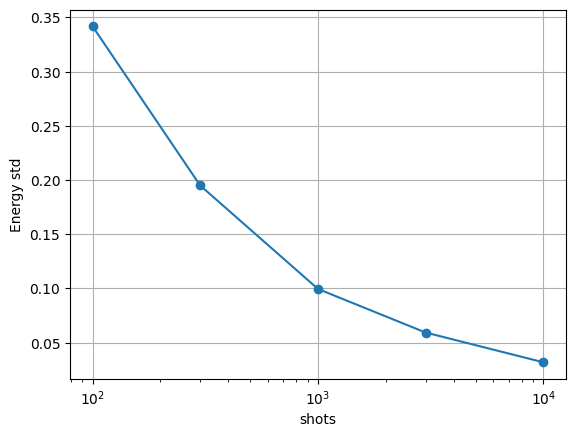

[np.float64(0.34175218008780484), np.float64(0.19498592591894537), np.float64(0.09947570771982076), np.float64(0.05932340183163029), np.float64(0.03183514052643299)]


In [22]:

list_shots=[100, 300, 1000, 3000, 10000]

desviaciones=[]
medias=[]
for shots in list_shots:
    energies=[]
    print('----------------',shots,'----------------')
    for _ in tqdm(range(200), leave=False, desc="Repeticiones"):
        with contextlib.redirect_stdout(f):
            Et_shots = Qibo_measure_Energy(monoparticular_energies, two_index, Qibo_circuits, exact=False, nshots=shots)
        energies.append(Et_shots)
    desviaciones.append(np.std(energies))
    medias.append(np.mean(energies))
    print('DONE')
    
    
plt.figure()
plt.semilogx(list_shots, desviaciones, marker='o')  
plt.xlabel('shots')
plt.ylabel('Energy std')

plt.grid(True)
plt.show()


print(desviaciones)

In [23]:
data_mixed, nucleo=ADAPT_mixed_minimization(data=data, nucleus=nuc, ref_state = ref_state, n_qubits=n_qubits, max_layers=5, exact=False, opt_method='COBYLA', nshots=1000)

0
Energy,			observable,		amplitude

1.63 		 0 		 1.63
1.63 		 3 		 1.63
-1.6921 		 [0, 3, 0, 3] 		 -1.6921
-0.0646722 		 [0, 3, 1, 2] 		 1.0431
-0.0242605 		 [0, 3, 1, 5] 		 -1.10275
0.017644 		 [0, 3, 2, 4] 		 -1.10275

-----------------------------------Final Energies-----------------------------------

Monoparticular energies:                  3.26
Two body energies with 2 diferent index:  -1.6920999999999997
Two body energies with 3 diferent index:  0.0
Two body energies with 4 diferent index:  -0.07128870000000027
 --------------------------------------------------------------------------
                            ADAPT for  Be6
 --------------------------------------------------------------------------

0
Energy,			observable,		amplitude

1.63 		 0 		 1.63
1.63 		 3 		 1.63
-1.6921 		 [0, 3, 0, 3] 		 -1.6921
0.0333792 		 [0, 3, 1, 2] 		 1.0431
0.004411 		 [0, 3, 1, 5] 		 -1.10275
0.022055 		 [0, 3, 2, 4] 		 -1.10275
-0.01505543 		 [0, 3, 4, 5] 		 -3.76385869

------------------

In [ ]:
nshots=[100, 300, 1000, 3000, 10000]
results={}

with open("Be6_2_layer.dat", "w") as file:
    f.write("shots theta1_mean theta1_std theta2_mean theta2_std energy_mean energy_std\n")
    
for shots in nshots:
    thetas_1=[]
    thetas_2=[]
    thetas_3=[]
    energias=[]
    print('--------------', shots, ' shots --------------')
    for _ in tqdm(range(200), leave=False, desc="Repeticiones"):
        with contextlib.redirect_stdout(f):       
            data_mixed, nucleo=ADAPT_mixed_minimization(data=data, nucleus=nuc, ref_state = ref_state, n_qubits=n_qubits, max_layers=5, exact=False, opt_method='COBYLA', nshots=shots)
        thetas_1.append(data_mixed['parameters'][0])
        thetas_2.append(data_mixed['parameters'][1])

        energias.append(data_mixed['Energy'])
        
    print('DONE')
    results[shots] = {'theta_1': [np.mean(thetas_1), np.std(thetas_1)], 'theta_2':[np.mean(thetas_2), np.std(thetas_2)],  'energy':[np.mean(energias), np.std(energias)]}
    
    media_t1, std_t1 = results[shots]['theta_1']
    media_t2, std_t2 = results[shots]['theta_2']

    media_E, std_E = results[shots]['energy']
    
    with open("Be6_2_layer.dat", "a") as file:
        file.write(f"{shots} {media_t1:.6f} {std_t1:.6f} {media_t2:.6f} {std_t2:.6f} {media_E:.6f} {std_E:.6f}\n")


-------------- 100  shots --------------


Repeticiones:   6%|▌         | 12/200 [07:33<1:42:08, 32.60s/it]